In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!cp "/content/drive/MyDrive/Colab Notebooks/Housing/train.csv" .
!cp "/content/drive/MyDrive/Colab Notebooks/Housing/test.csv"  .


# EDA


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('train.csv')

# 2. Basic overview
print("Shape:", df.shape)
print("\nColumns and types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

Shape: (1460, 81)

Columns and types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

First 5 rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0  

In [95]:
# Summary statistics
print("\nNumeric summary:")
print(df.describe())


Numeric summary:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.06620

In [96]:
#  Missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nColumns with missing values:")
print(missing)


Columns with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


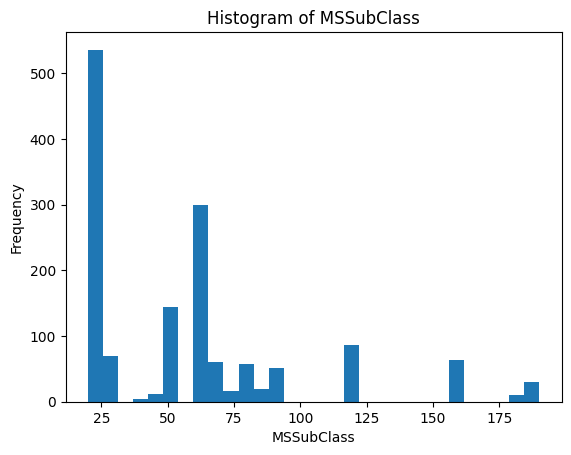

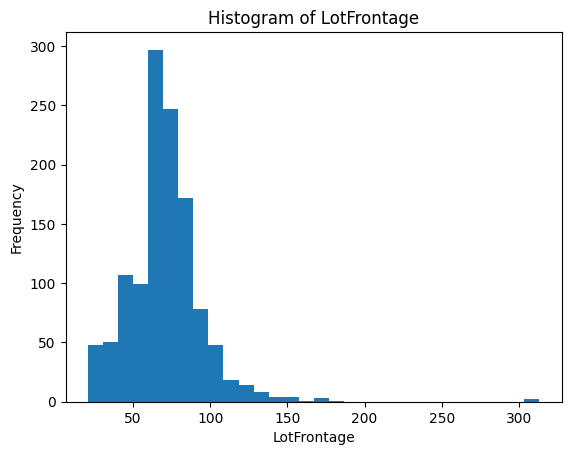

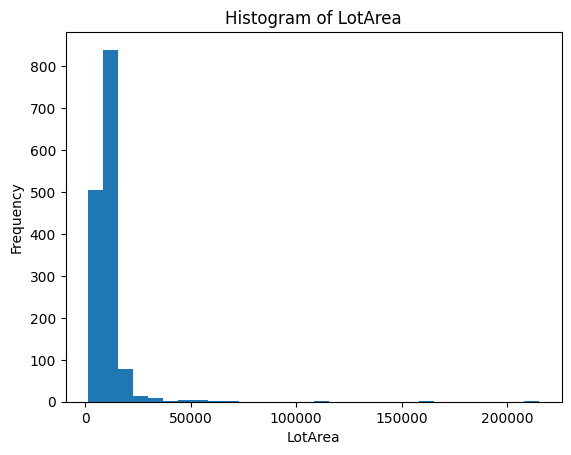

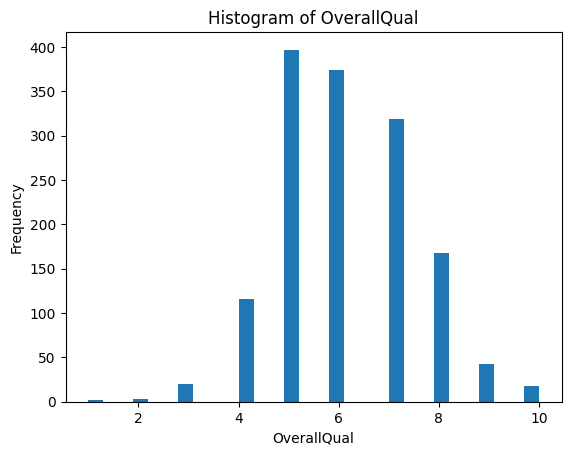

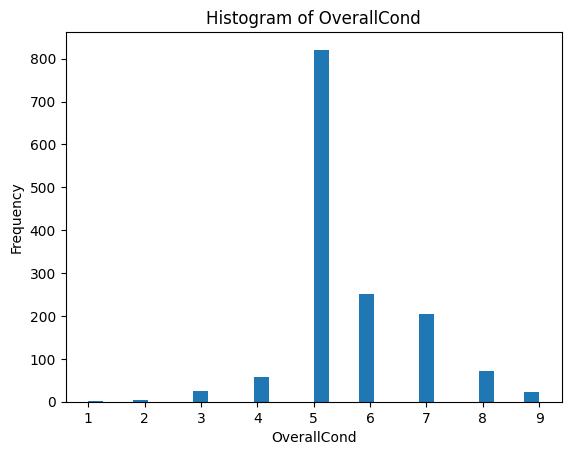

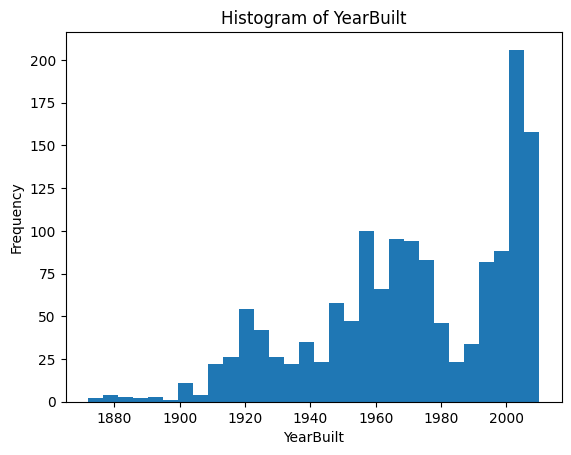

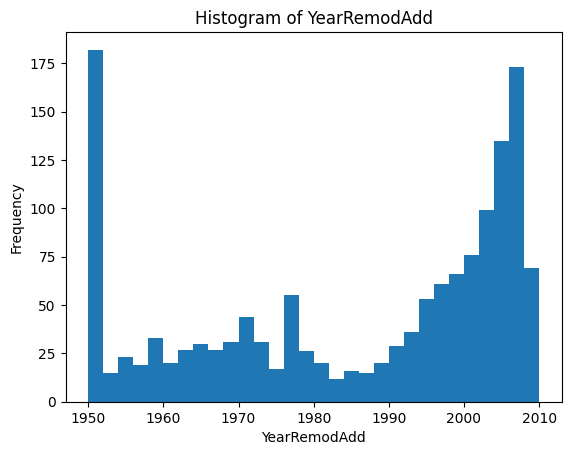

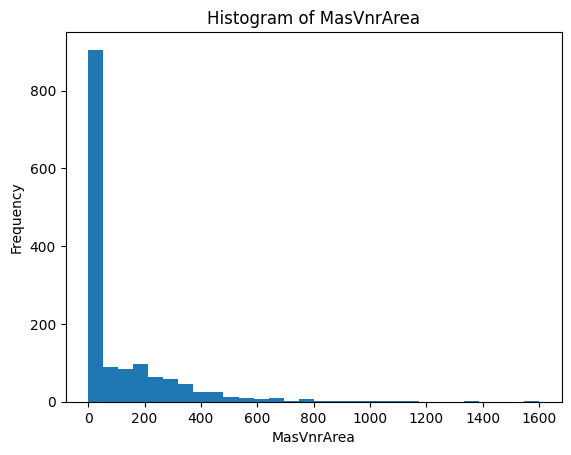

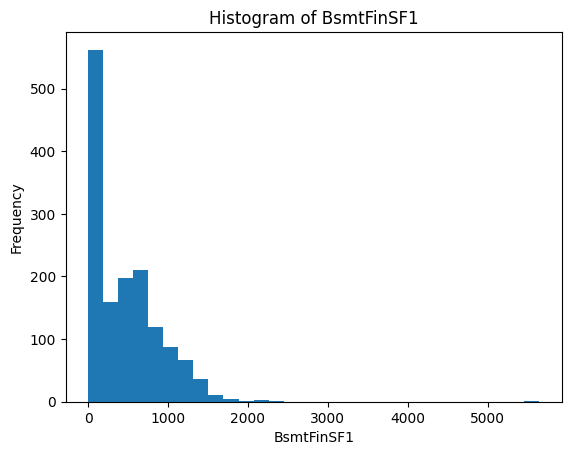

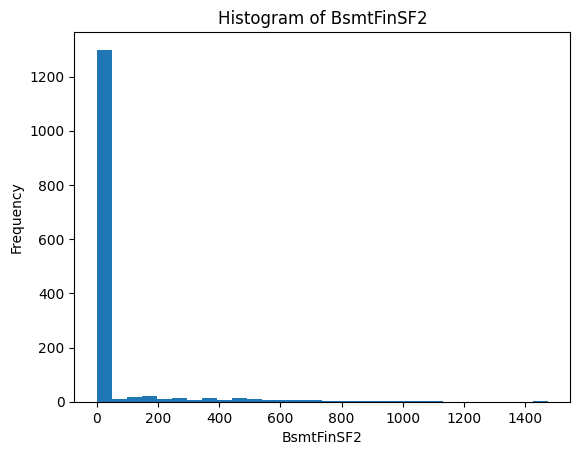

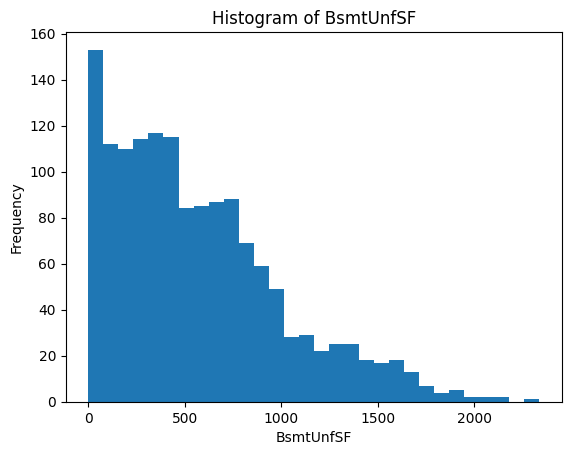

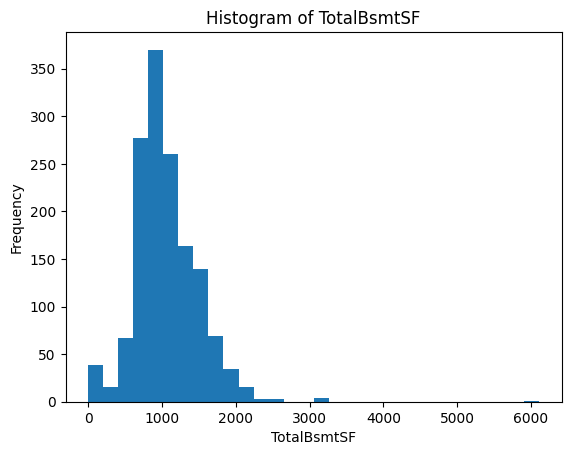

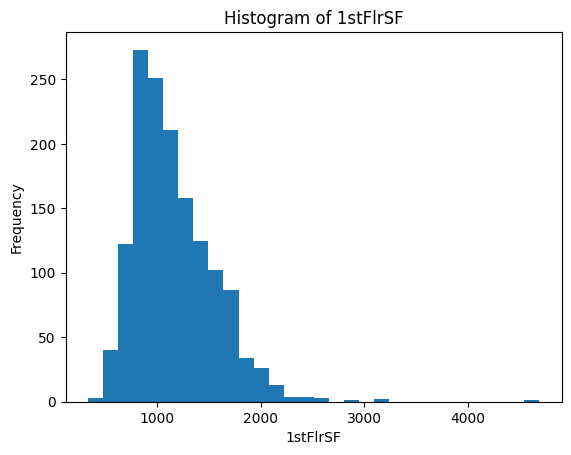

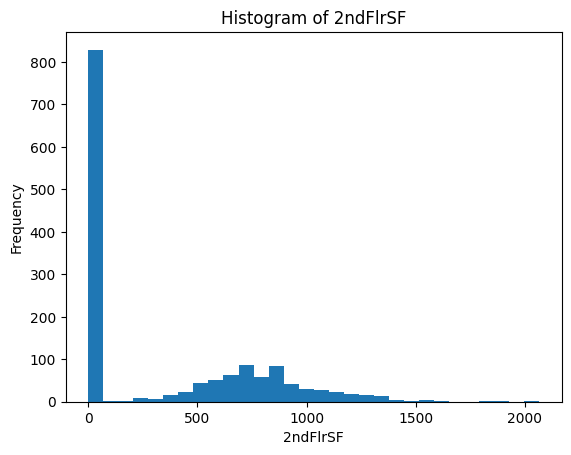

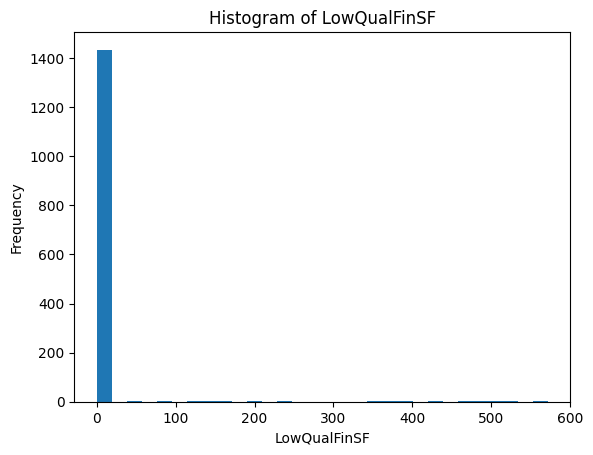

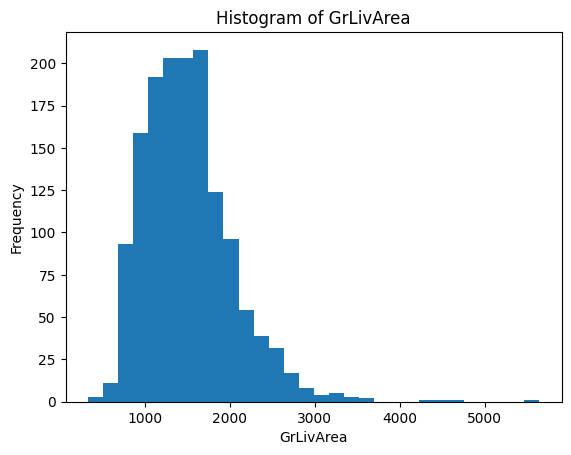

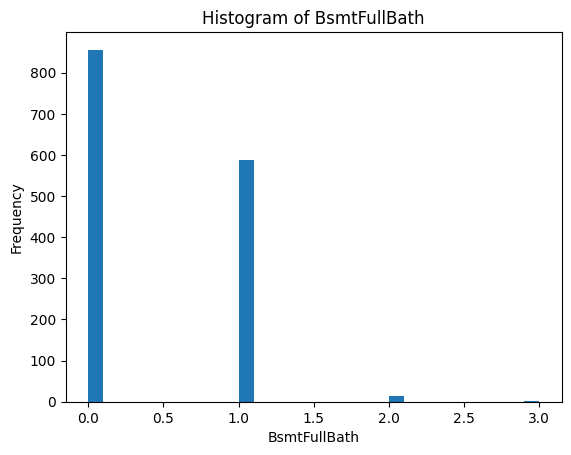

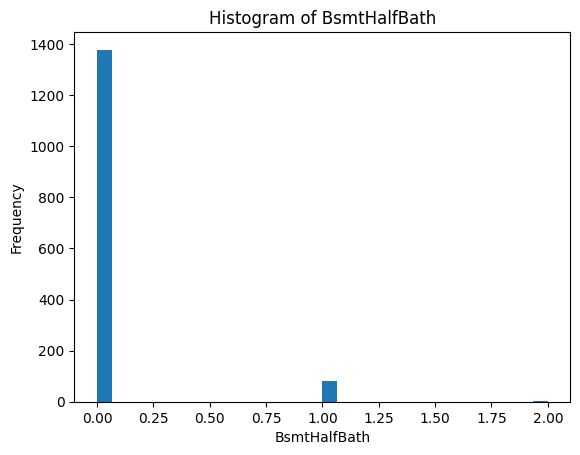

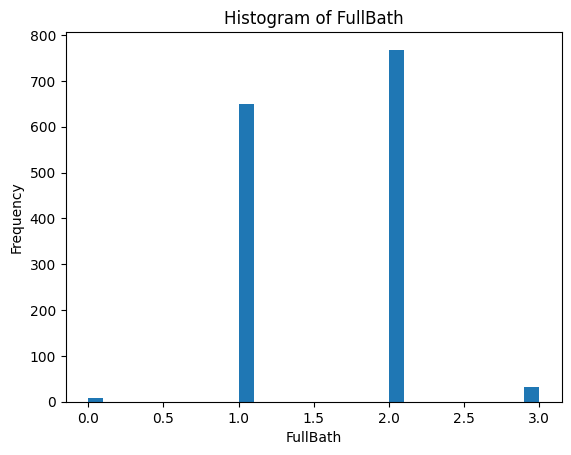

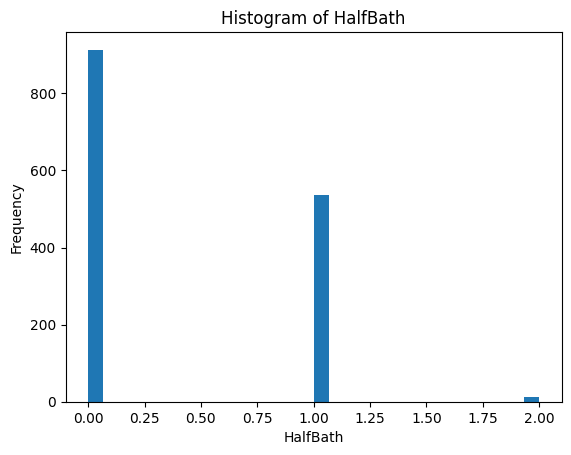

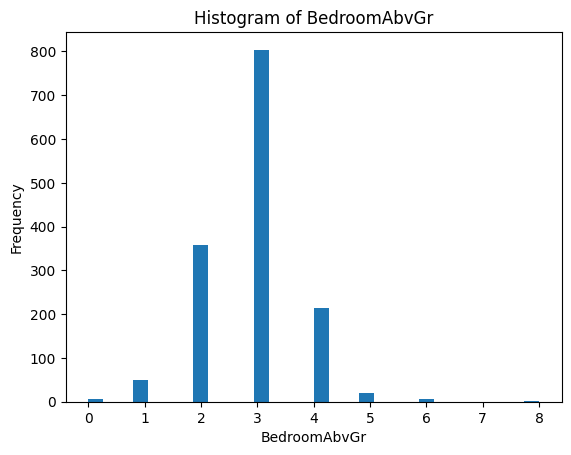

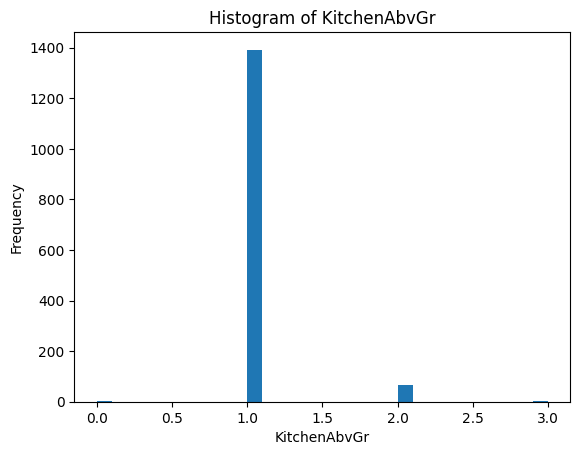

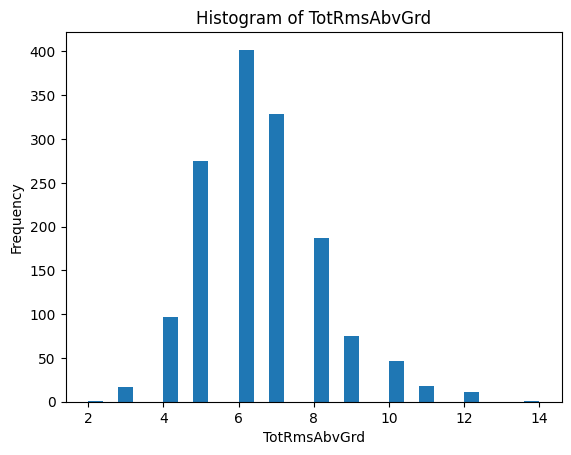

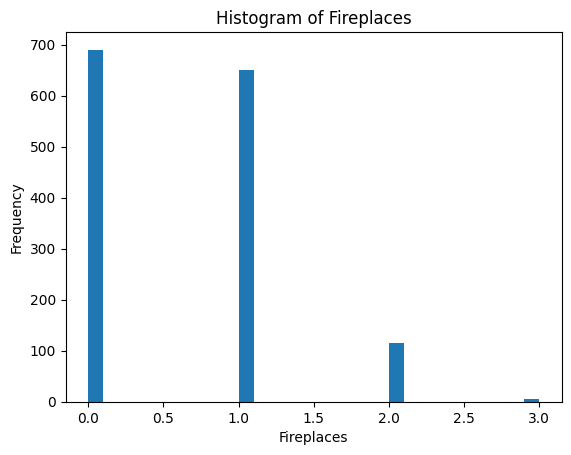

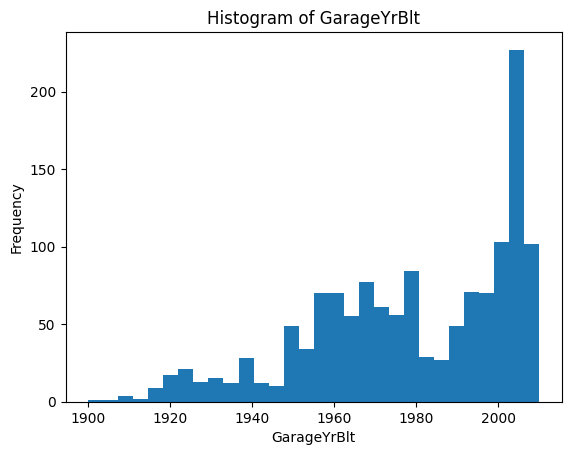

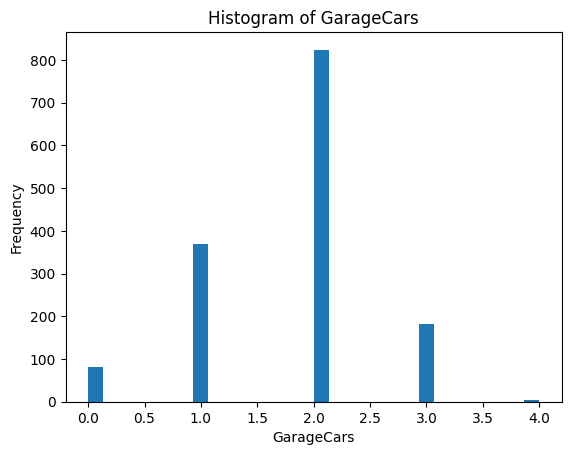

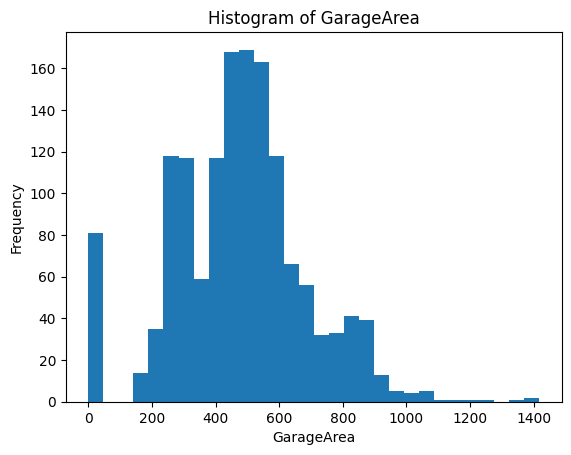

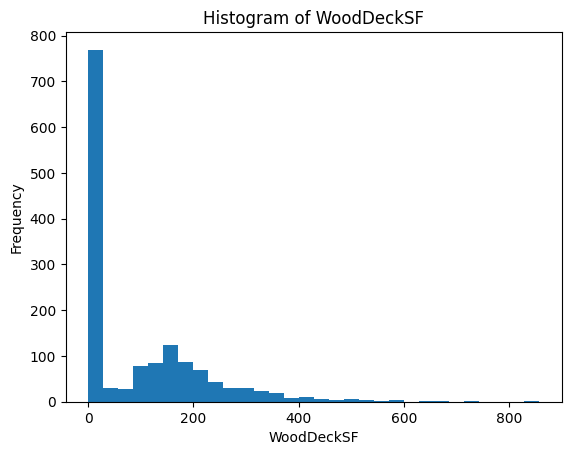

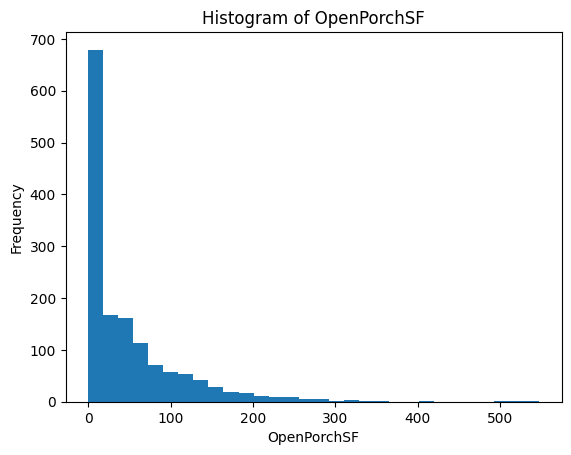

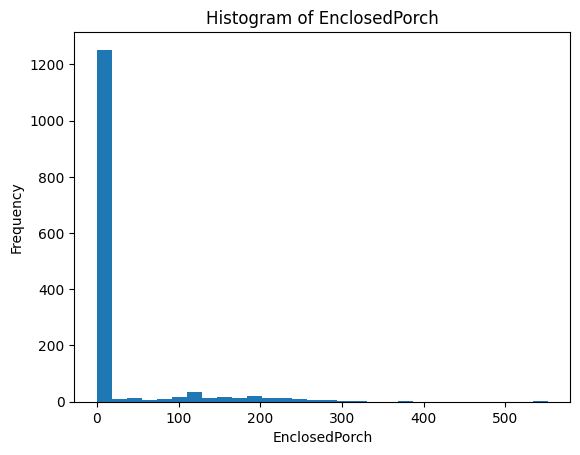

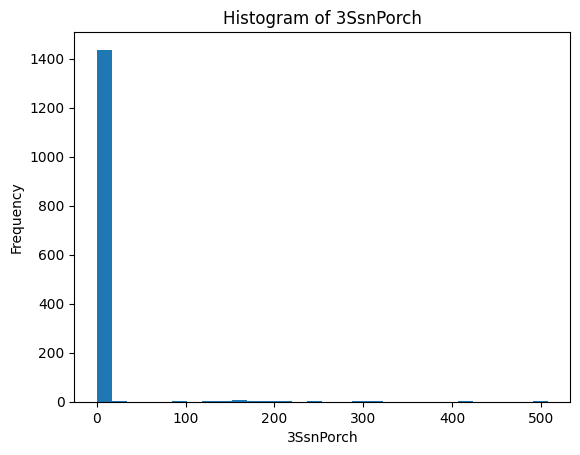

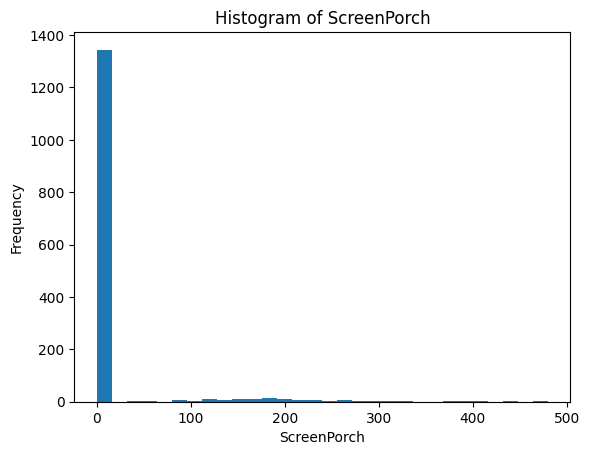

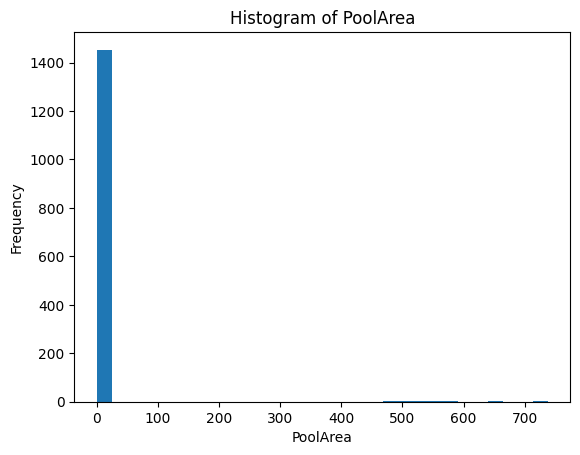

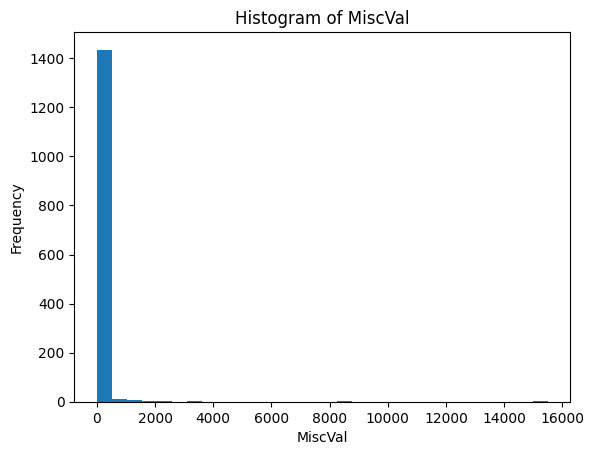

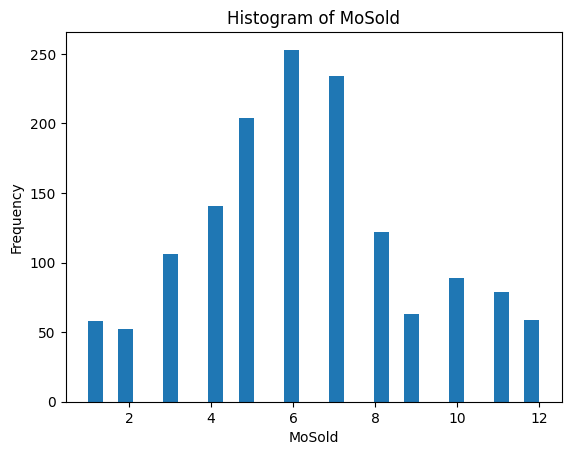

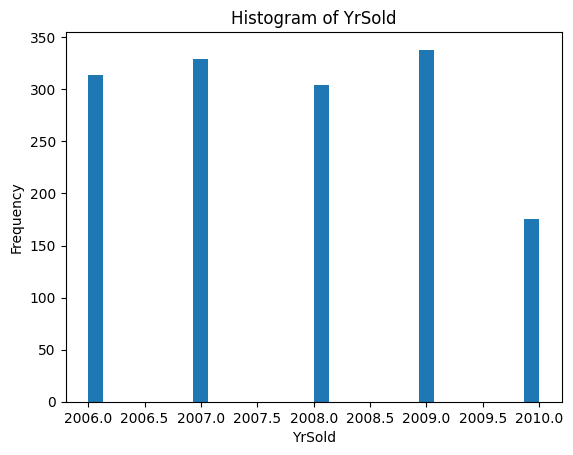

In [97]:
# Numeric features: histograms
num_cols = df.select_dtypes(include='number').columns.drop(['Id', 'SalePrice'])
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

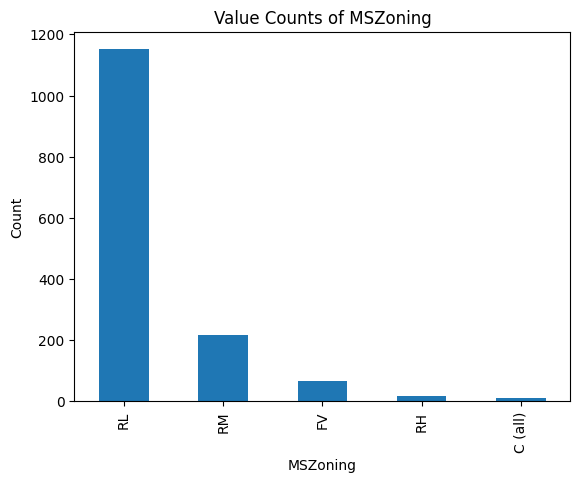

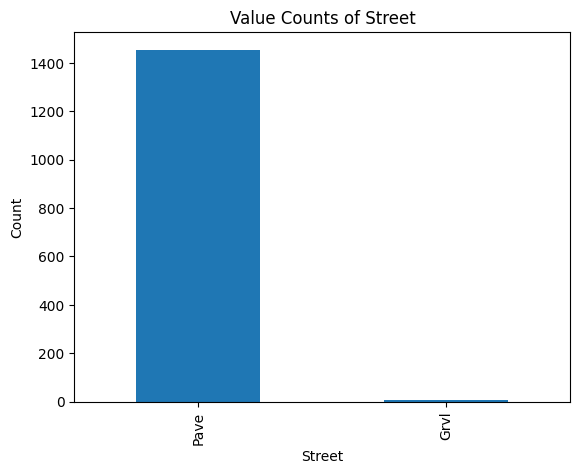

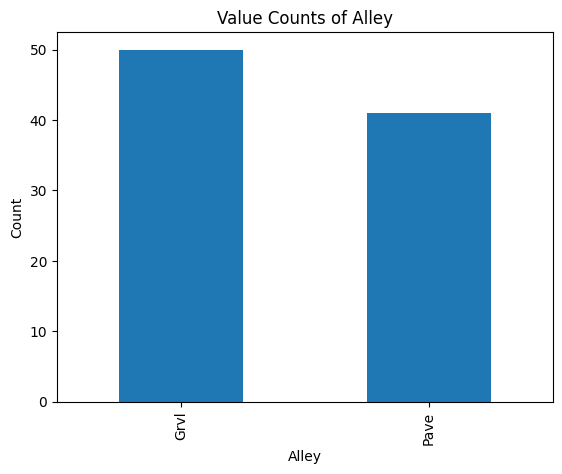

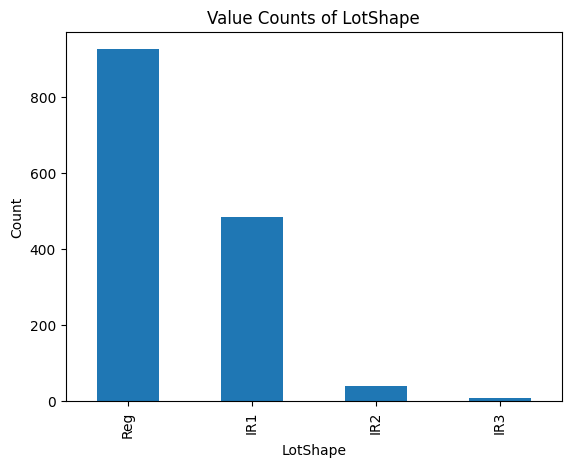

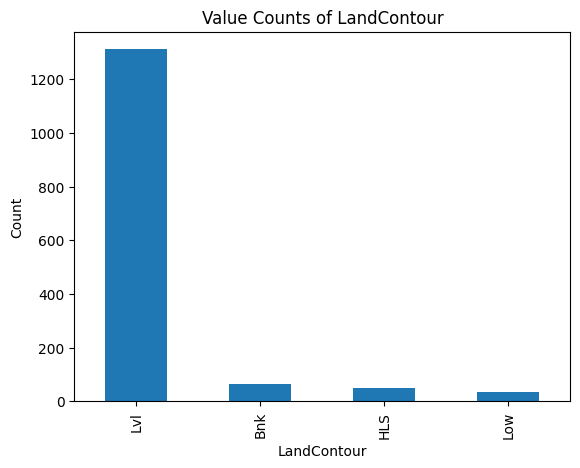

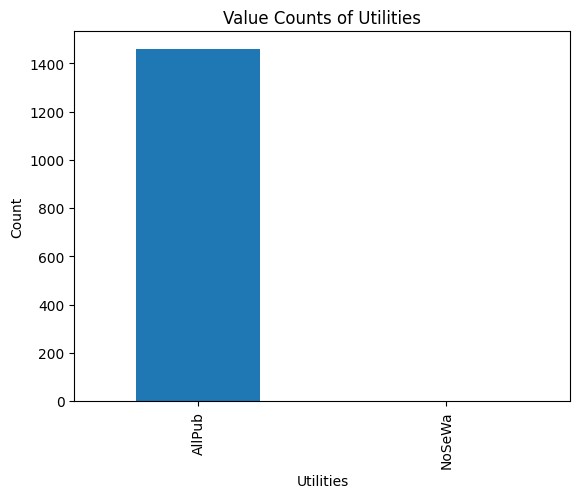

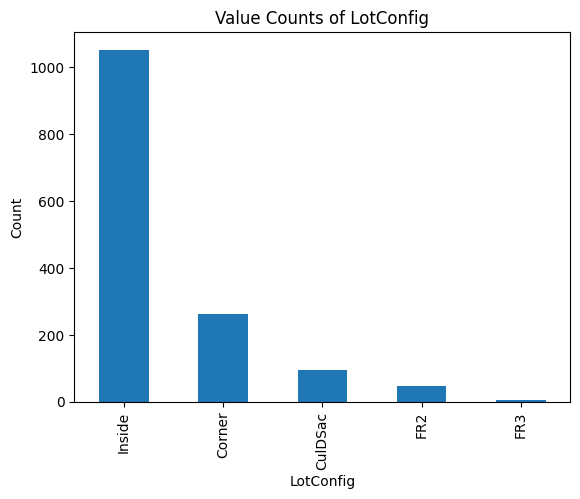

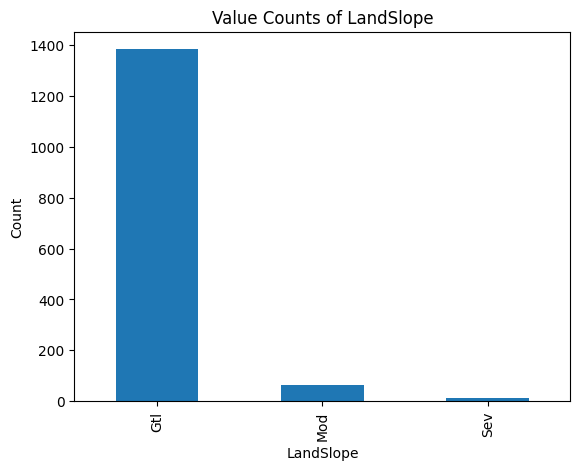

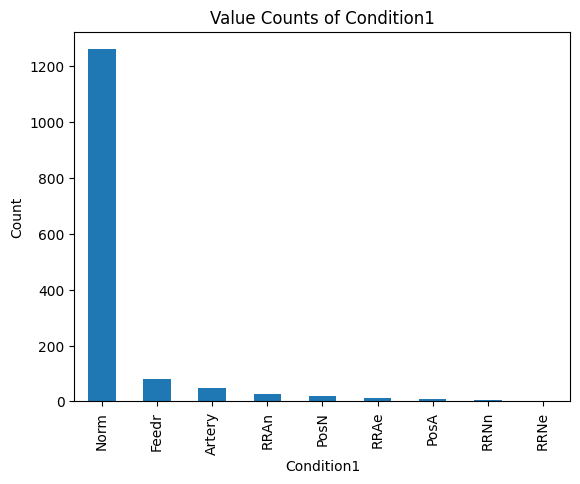

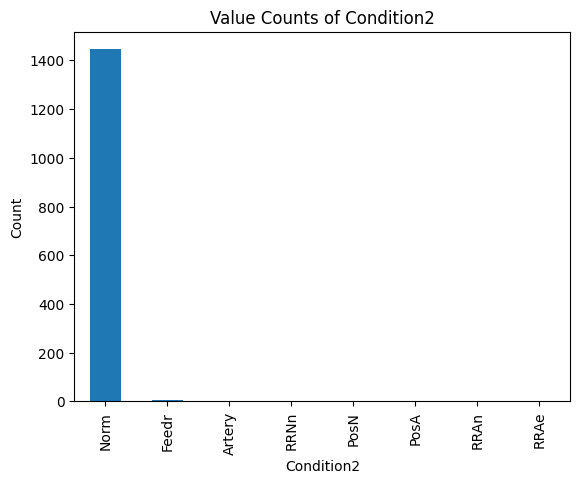

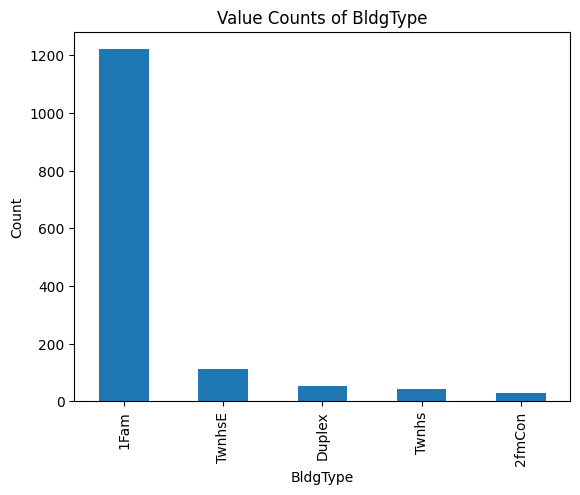

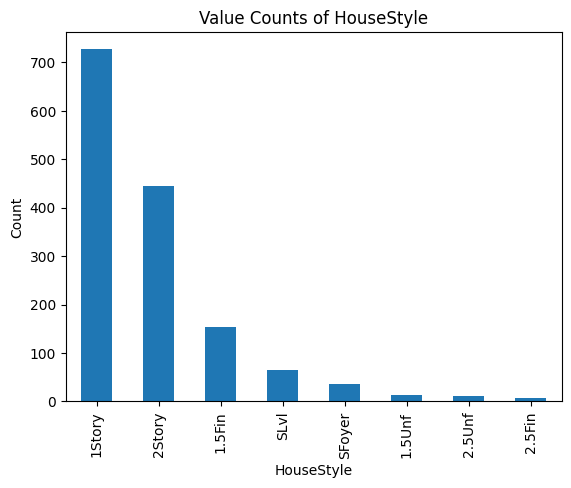

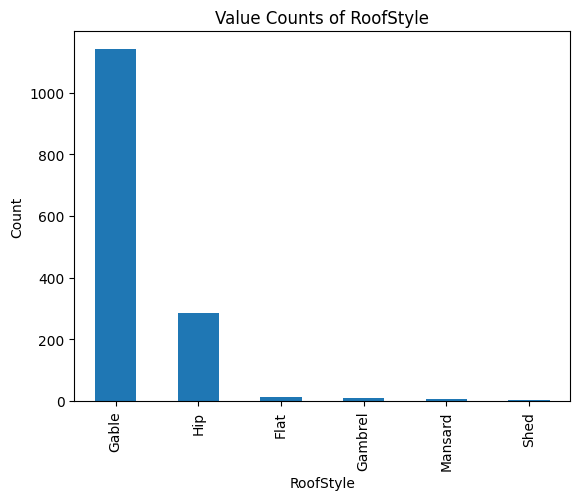

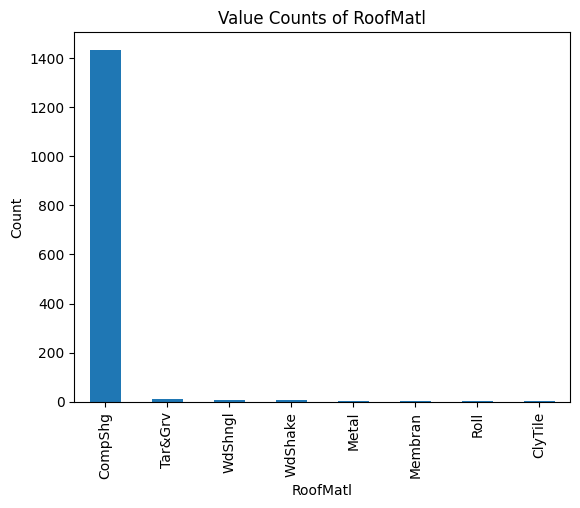

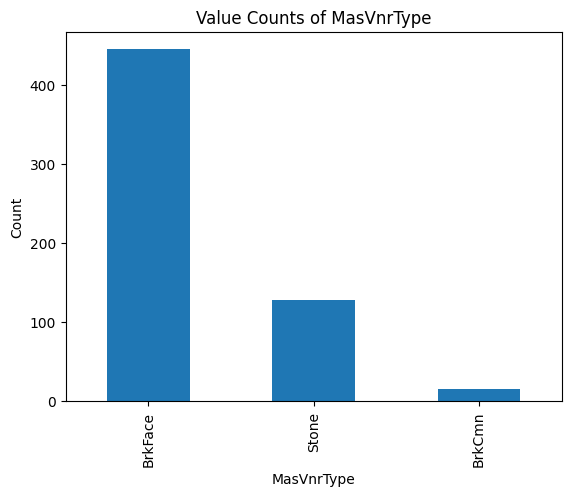

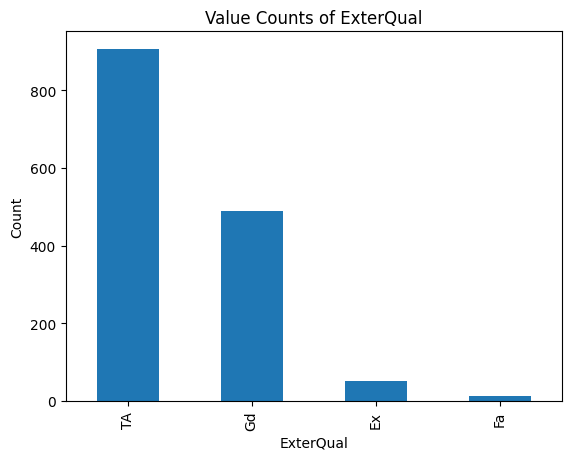

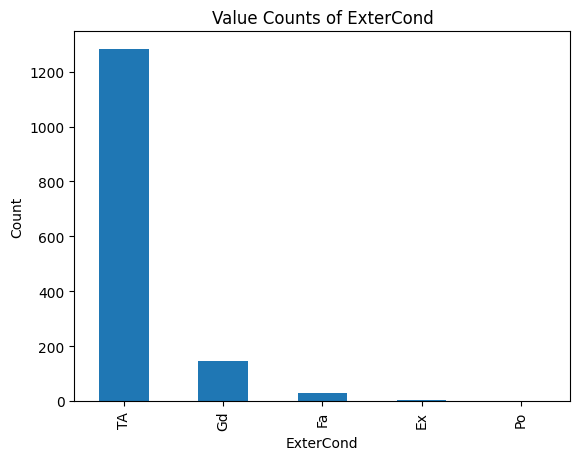

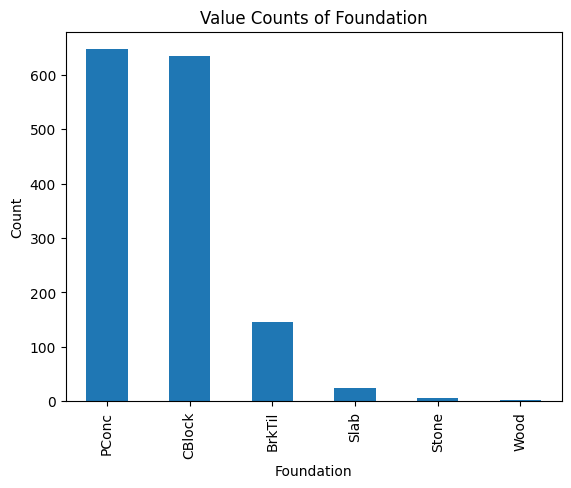

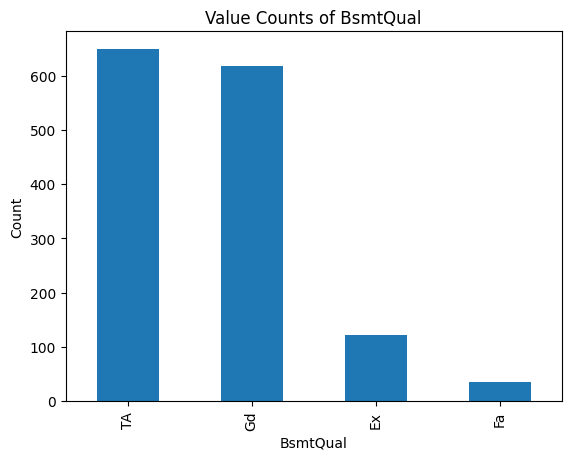

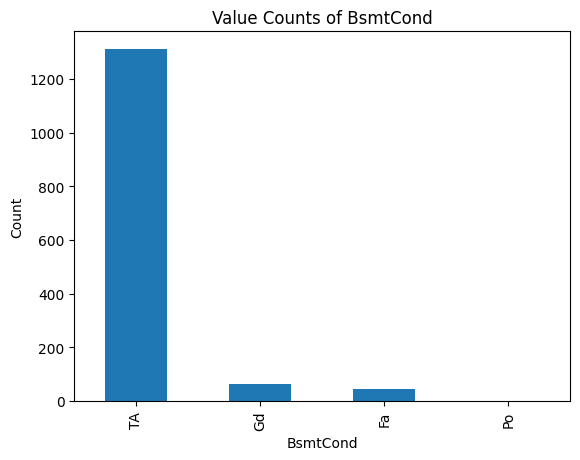

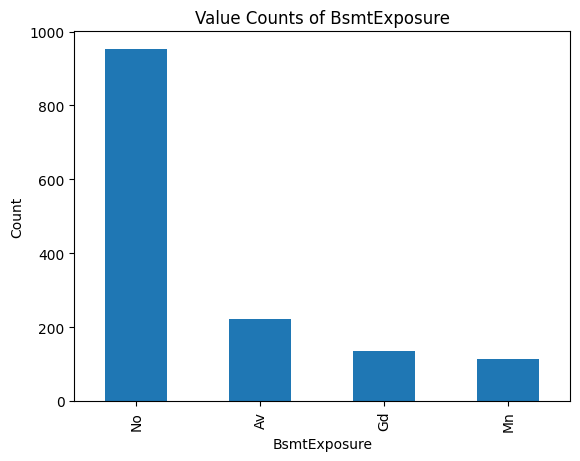

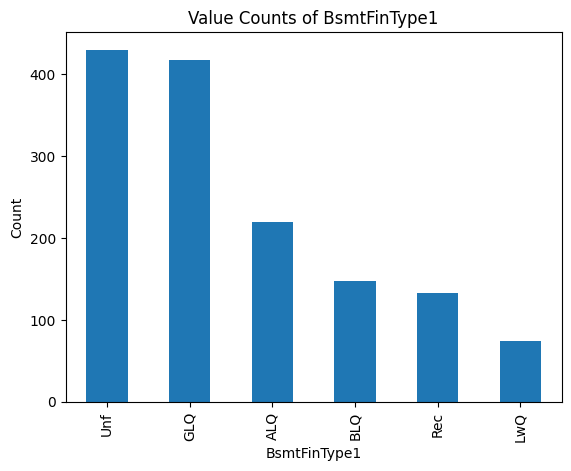

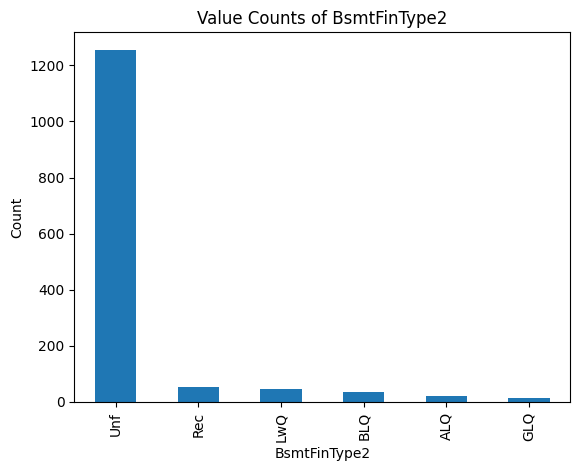

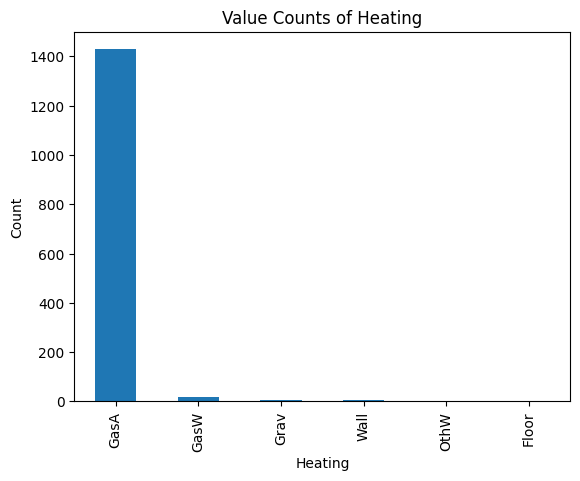

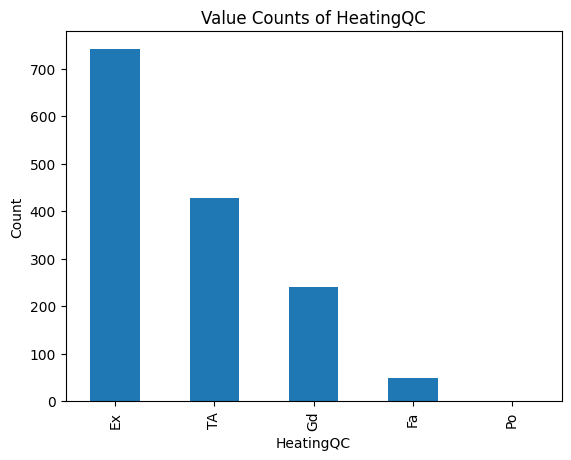

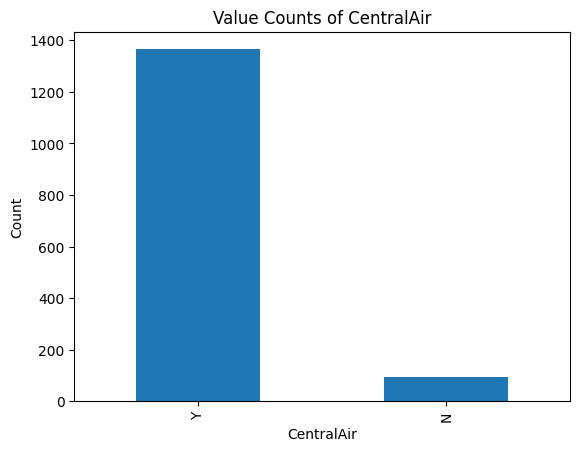

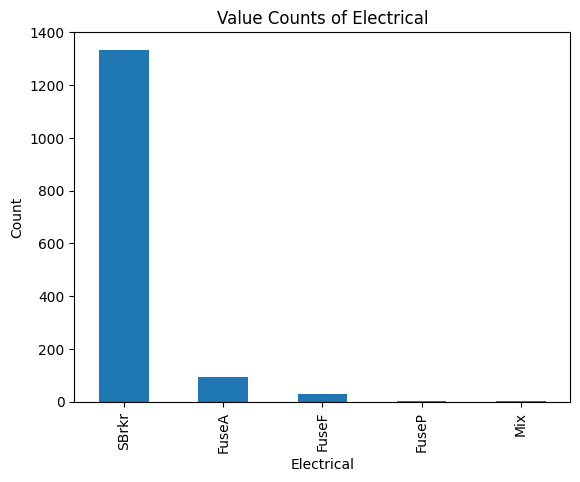

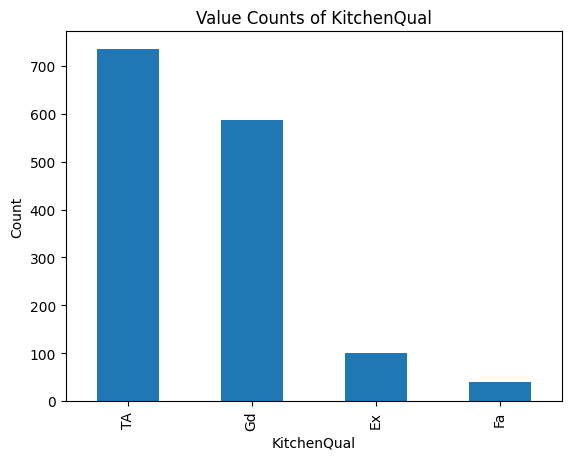

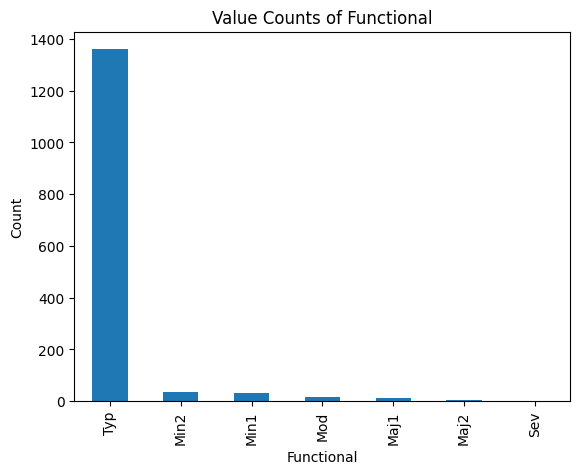

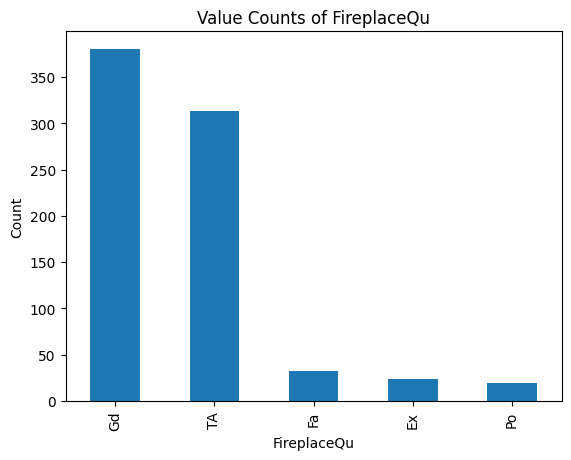

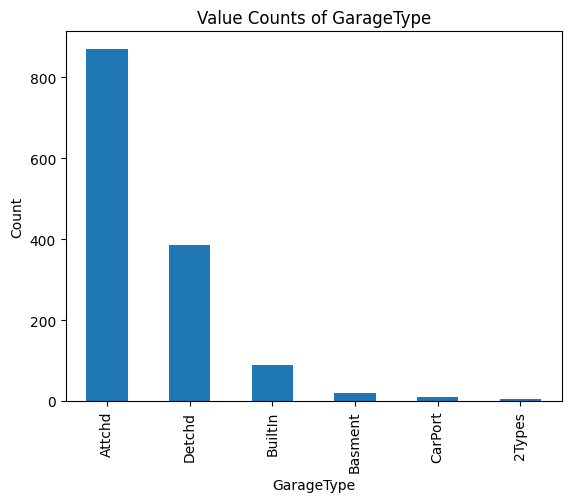

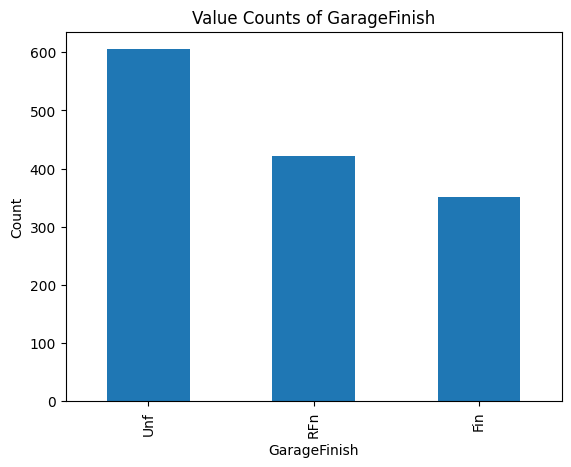

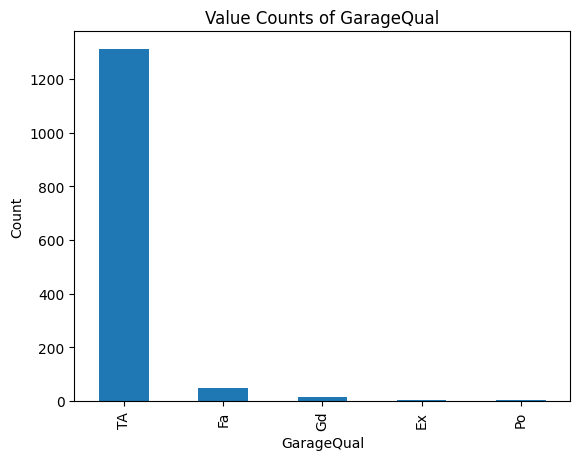

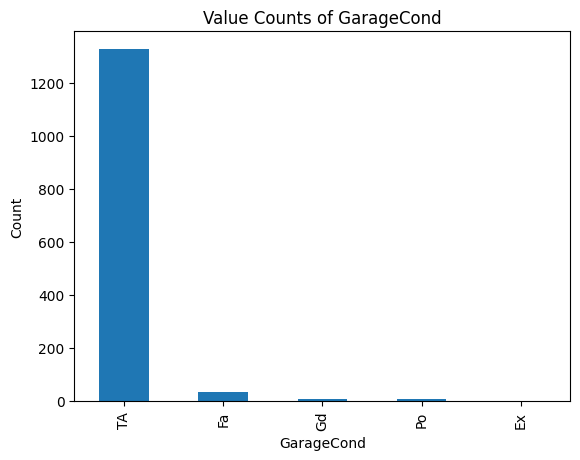

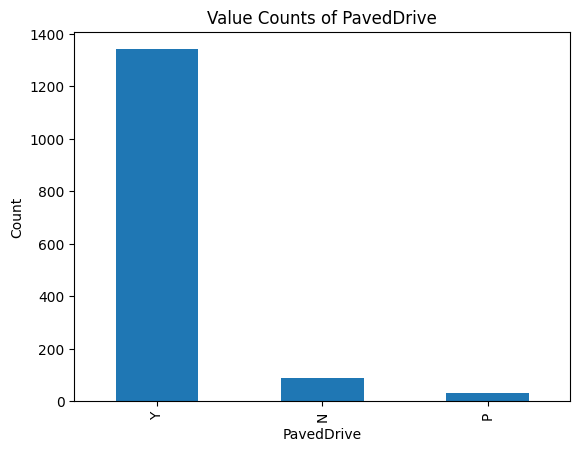

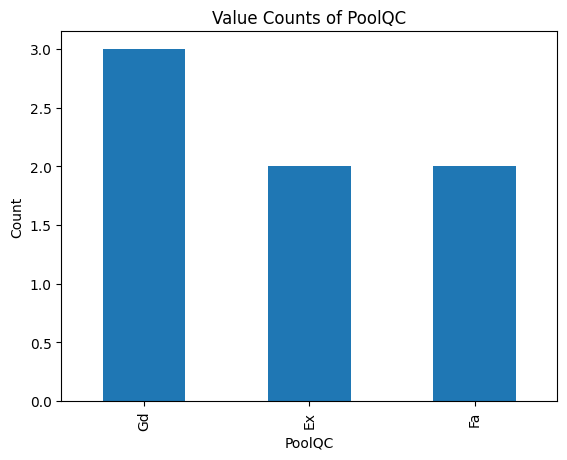

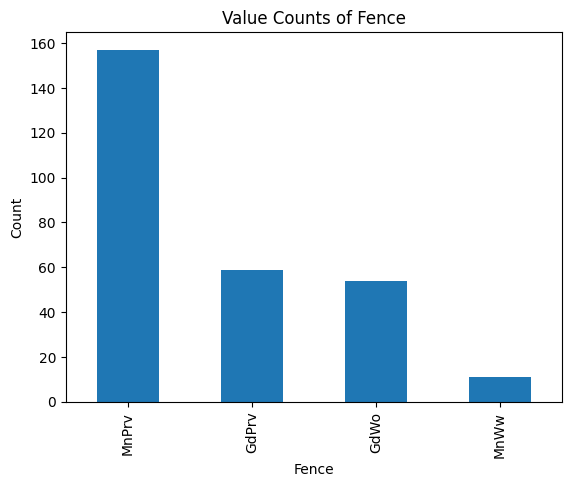

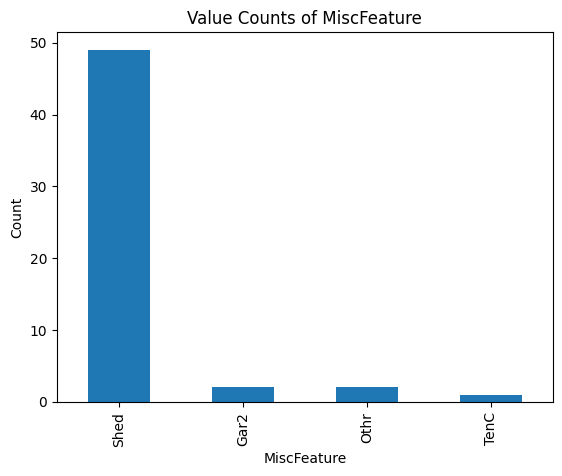

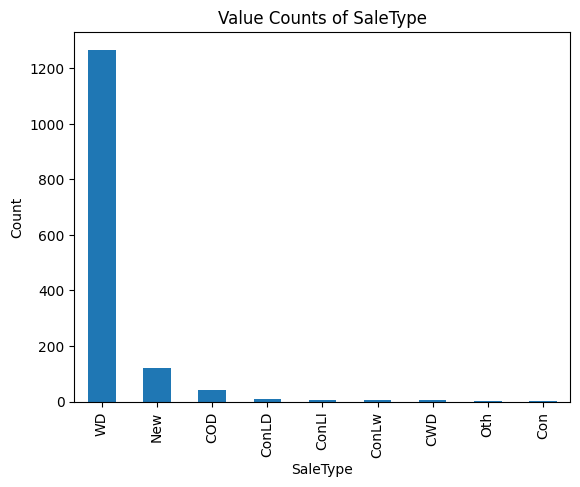

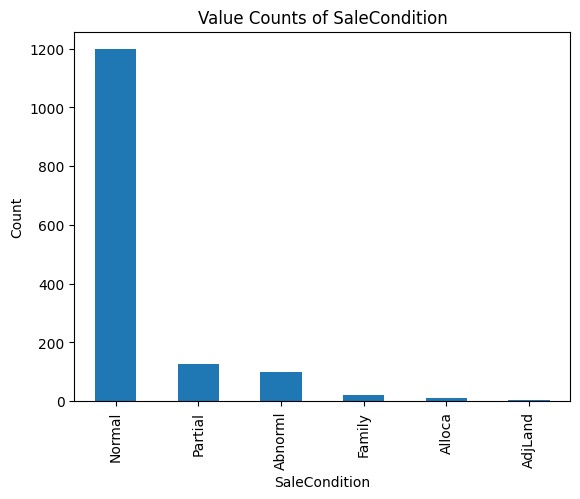

In [98]:
# Categorical features with few levels: bar charts
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    if df[col].nunique() <= 10:
        plt.figure()
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Value Counts of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

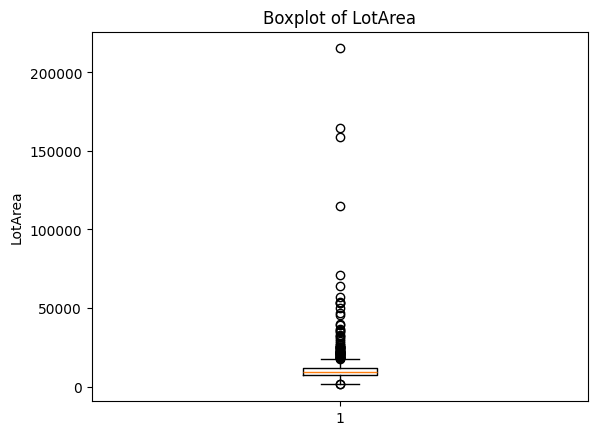

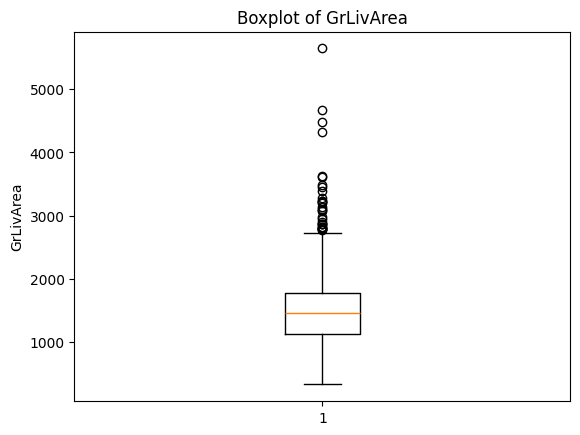

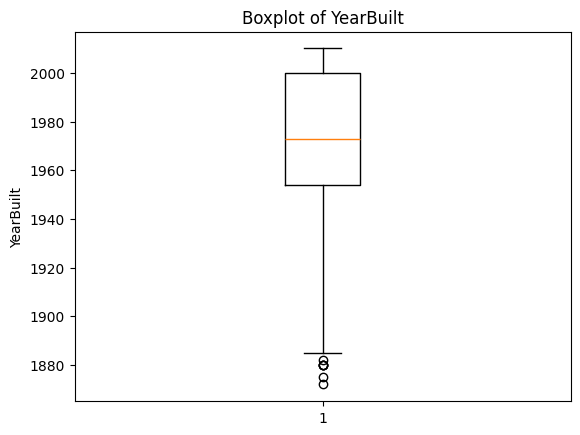

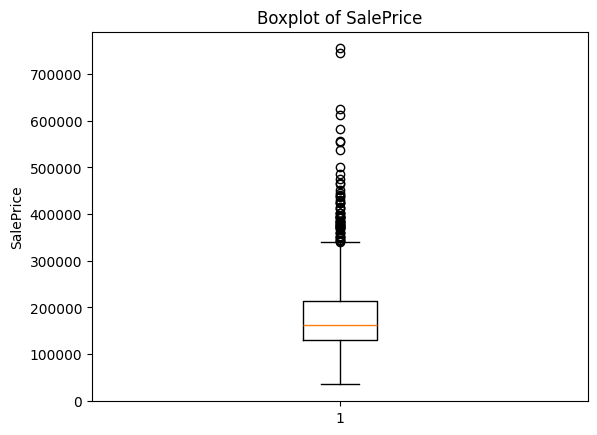

In [99]:
# Boxplots to spot outliers in key numeric features
for col in ['LotArea','GrLivArea','YearBuilt','SalePrice']:
    if col in df.columns:
        plt.figure()
        plt.boxplot(df[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()

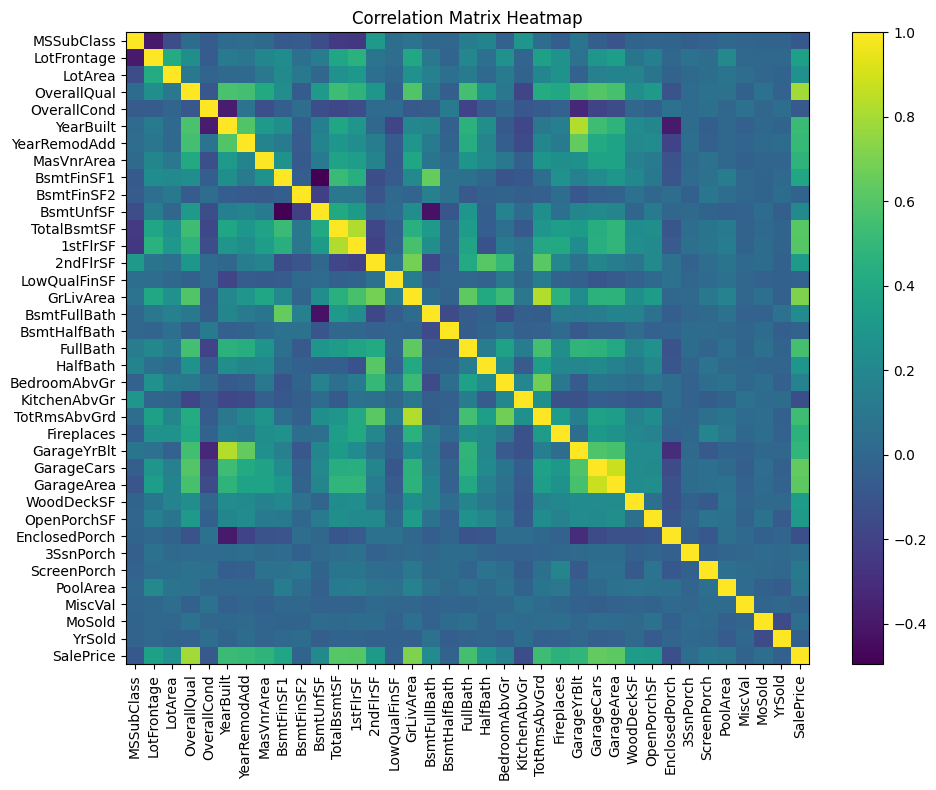

In [100]:
# Correlation matrix heatmap (numeric only)
num_df = df[num_cols.tolist() + ['SalePrice']]
corr = num_df.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Principal Component Analysis(PCA)

In [88]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

#  Load data
df = pd.read_csv('train.csv')

#  Select numeric features (drop ID and target)
num_cols = df.select_dtypes(include='number').columns.drop(['Id', 'SalePrice'])

#  Build a pipeline: median‐impute → standard‐scale → PCA(80% variance)
pca_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.80, svd_solver='full'))
])

#  Fit pipeline
pca_pipeline.fit(df[num_cols])

#  Extract the fitted PCA step
pca = pca_pipeline.named_steps['pca']

#  How many PCs for 80% variance?
n_comp = pca.n_components_
print(f"Number of components to explain 80% of variance: {n_comp}\n")

Number of components to explain 80% of variance: 18



In [89]:
#  Explained‐variance table
explained = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(n_comp)],
    'ExplainedVarRatio': np.round(pca.explained_variance_ratio_, 4),
    'CumulativeVarRatio': np.round(np.cumsum(pca.explained_variance_ratio_), 4)
})
print("Explained variance per component:\n", explained, "\n")


Explained variance per component:
       PC  ExplainedVarRatio  CumulativeVarRatio
0    PC1             0.1979              0.1979
1    PC2             0.0890              0.2869
2    PC3             0.0715              0.3583
3    PC4             0.0562              0.4145
4    PC5             0.0410              0.4555
5    PC6             0.0331              0.4887
6    PC7             0.0320              0.5207
7    PC8             0.0315              0.5522
8    PC9             0.0308              0.5830
9   PC10             0.0302              0.6131
10  PC11             0.0291              0.6422
11  PC12             0.0284              0.6706
12  PC13             0.0281              0.6987
13  PC14             0.0265              0.7252
14  PC15             0.0255              0.7507
15  PC16             0.0250              0.7756
16  PC17             0.0235              0.7991
17  PC18             0.0226              0.8217 



In [90]:
# 8. Component loadings (which original features drive each PC)
loadings = pd.DataFrame(
    pca.components_.T,
    index=num_cols,
    columns=[f'PC{i+1}' for i in range(n_comp)]
)
print("Loadings (first 10 features):\n", loadings.iloc[:, :5].head(10), "\n")  # show a snippet


Loadings (first 10 features):
                    PC1       PC2       PC3       PC4       PC5
MSSubClass   -0.016256  0.165261  0.225946 -0.298934  0.303749
LotFrontage   0.161086 -0.011781 -0.274929  0.133135 -0.058422
LotArea       0.106963 -0.031153 -0.279778 -0.029376 -0.041045
OverallQual   0.301910 -0.018811  0.106227  0.006974 -0.131387
OverallCond  -0.083389  0.060663 -0.133088 -0.091101 -0.387905
YearBuilt     0.237629 -0.197525  0.324429 -0.030363  0.022151
YearRemodAdd  0.208752 -0.087435  0.266279 -0.027418 -0.151647
MasVnrArea    0.194928 -0.019907 -0.002797 -0.048924  0.016291
BsmtFinSF1    0.140403 -0.290762 -0.219868 -0.337362  0.144747
BsmtFinSF2   -0.012377 -0.070222 -0.172147 -0.091941 -0.079191 



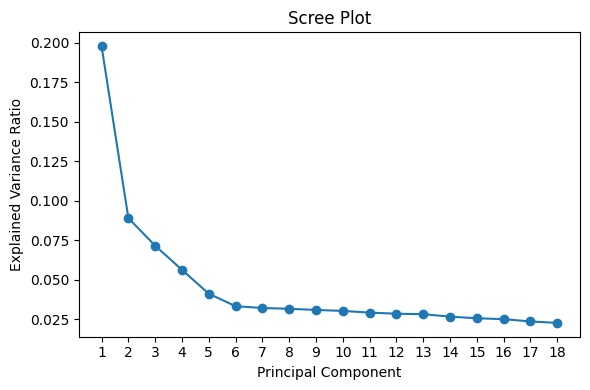

In [91]:
plt.figure(figsize=(6,4))
plt.plot(range(1, n_comp+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, n_comp+1))
plt.tight_layout()
plt.show()

In [92]:
X_pca = pca_pipeline.transform(df[num_cols])
print("Shape after PCA transform:", X_pca.shape)

Shape after PCA transform: (1460, 18)


# Model and Results

In [75]:
train_data = train_data.set_index("Id")
test_data = test_data.set_index("Id")

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [78]:

from sklearn.pipeline import Pipeline
from sklearn.impute   import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer",     SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse_output=False)),
])

In [79]:
from sklearn.compose import ColumnTransformer

num_attribs = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
cat_attribs = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [80]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

y_train = train_data["SalePrice"]

X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])

y_test=test_data

In [81]:
!pip install tensorflow

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint

model=Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

model.fit(X_train,y_train, batch_size=5, epochs=150)

y_pred = model.predict(X_test)

result=test_data.index.values
result

Epoch 1/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 32097411072.0000 - mean_squared_error: 32097413120.0000
Epoch 2/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2583929856.0000 - mean_squared_error: 2583929856.0000
Epoch 3/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1406736256.0000 - mean_squared_error: 1406736256.0000
Epoch 4/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1022927936.0000 - mean_squared_error: 1022927936.0000
Epoch 5/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1019717888.0000 - mean_squared_error: 1019717888.0000
Epoch 6/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1345931264.0000 - mean_squared_error: 1345931264.0000
Epoch 7/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1097052544.0000 - mean_squared_error: 1097052544.0000
Epoch 8/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 813315200.0000 - mean_squared_error: 813315200.0000
Epoch 9/150
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 701284864.0000 

array([1461, 1462, 1463, ..., 2917, 2918, 2919])

In [84]:
df_result = pd.DataFrame(result,columns=['Id'])
df_result["SalePrice"]=y_pred
df_result

,Id,SalePrice
0,1461,135321.875000
1,1462,157201.968750
2,1463,180448.390625
3,1464,192623.765625
4,1465,179447.343750
...,...,...
1454,2915,82518.687500
1455,2916,83362.992188
1456,2917,156547.968750
1457,2918,126882.695312


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#  Split your original training data into train & validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

#  Train your model on the training split, and monitor validation loss
history = model.fit(
    X_train_split,
    y_train_split,
    batch_size=5,
    epochs=150,
    validation_data=(X_val, y_val),
    verbose=2
)

#  Predict on the validation set
y_pred_val = model.predict(X_val)

#  Compute and print regression metrics
mse  = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2   = r2_score(y_val, y_pred_val)

print(f"Validation MSE:  {mse:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R²:   {r2:.3f}")


Epoch 1/150
234/234 - 1s - 6ms/step - loss: 136934768.0000 - mean_squared_error: 136934768.0000 - val_loss: 124530704.0000 - val_mean_squared_error: 124530704.0000
Epoch 2/150
234/234 - 1s - 3ms/step - loss: 133740376.0000 - mean_squared_error: 133740376.0000 - val_loss: 158962224.0000 - val_mean_squared_error: 158962224.0000
Epoch 3/150
234/234 - 2s - 10ms/step - loss: 129104896.0000 - mean_squared_error: 129104896.0000 - val_loss: 175409088.0000 - val_mean_squared_error: 175409088.0000
Epoch 4/150
234/234 - 1s - 4ms/step - loss: 127752320.0000 - mean_squared_error: 127752320.0000 - val_loss: 152971840.0000 - val_mean_squared_error: 152971840.0000
Epoch 5/150
234/234 - 2s - 7ms/step - loss: 124871312.0000 - mean_squared_error: 124871312.0000 - val_loss: 150174544.0000 - val_mean_squared_error: 150174544.0000
Epoch 6/150
234/234 - 2s - 10ms/step - loss: 119997272.0000 - mean_squared_error: 119997272.0000 - val_loss: 187075104.0000 - val_mean_squared_error: 187075104.0000
Epoch 7/150
23